In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

In [5]:
by_boro = pd.read_csv("https://raw.githubusercontent.com/nychealth/coronavirus-data/master/totals/group-data-by-boro.csv")

In [6]:
by_boro

,group,subgroup,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BK_CASE_RATE,BK_HOSPITALIZED_RATE,BK_DEATH_RATE,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,...,QN_DEATH_COUNT,QN_CASE_RATE,QN_HOSPITALIZED_RATE,QN_DEATH_RATE,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_CASE_RATE,SI_HOSPITALIZED_RATE,SI_DEATH_RATE
0,Boroughwide,Boroughwide,229719.0,31649.0,8520.0,8973.74,1236.34,332.83,150149.0,22791.0,...,8515.0,10091.14,1421.92,377.80,61920.0,5850.0,1602.0,13004.50,1228.62,336.45
1,Age,0-4,5921.0,257.0,NaN,3236.83,140.49,NaN,3599.0,178.0,...,NaN,3509.97,118.90,NaN,1465.0,33.0,NaN,5355.71,120.64,NaN
2,Age,5-12,12944.0,155.0,NaN,5137.01,61.51,NaN,8047.0,102.0,...,NaN,5410.41,45.94,NaN,3569.0,18.0,NaN,7800.25,39.34,NaN
3,Age,13-17,9588.0,159.0,NaN,6840.67,113.44,NaN,5822.0,129.0,...,NaN,7129.41,112.38,NaN,3252.0,35.0,NaN,10888.63,117.19,NaN
4,Age,0-17,NaN,NaN,9.0,NaN,NaN,1.57,NaN,NaN,...,6.0,NaN,NaN,1.34,NaN,NaN,2.0,NaN,NaN,1.94
5,Age,18-24,21074.0,819.0,21.0,10140.13,394.08,10.10,13613.0,646.0,...,7.0,11348.71,339.18,4.07,6706.0,118.0,6.0,16903.58,297.44,15.12
6,Age,25-34,43091.0,2175.0,81.0,9167.50,462.73,17.23,26597.0,1652.0,...,75.0,11237.58,594.98,20.85,10631.0,314.0,12.0,16426.40,485.17,18.54
7,Age,35-44,35600.0,2508.0,175.0,9944.52,700.59,48.88,23354.0,2004.0,...,234.0,12174.92,934.37,76.42,9436.0,464.0,33.0,15946.19,784.13,55.77
8,Age,45-54,31516.0,3497.0,529.0,10670.15,1183.95,179.10,23672.0,3049.0,...,537.0,12371.62,1435.16,179.48,9730.0,771.0,94.0,15162.38,1201.46,146.48
9,Age,55-64,31179.0,5918.0,1234.0,10911.86,2071.15,431.87,22417.0,4710.0,...,1439.0,11538.67,2266.80,478.92,8842.0,1172.0,197.0,13370.63,1772.27,297.90


In [7]:
by_boro.drop([12,13,14,15,16,17], inplace=True)

In [8]:
by_boro

,group,subgroup,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BK_CASE_RATE,BK_HOSPITALIZED_RATE,BK_DEATH_RATE,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,...,QN_DEATH_COUNT,QN_CASE_RATE,QN_HOSPITALIZED_RATE,QN_DEATH_RATE,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_CASE_RATE,SI_HOSPITALIZED_RATE,SI_DEATH_RATE
0,Boroughwide,Boroughwide,229719.0,31649.0,8520.0,8973.74,1236.34,332.83,150149.0,22791.0,...,8515.0,10091.14,1421.92,377.80,61920.0,5850.0,1602.0,13004.50,1228.62,336.45
1,Age,0-4,5921.0,257.0,NaN,3236.83,140.49,NaN,3599.0,178.0,...,NaN,3509.97,118.90,NaN,1465.0,33.0,NaN,5355.71,120.64,NaN
2,Age,5-12,12944.0,155.0,NaN,5137.01,61.51,NaN,8047.0,102.0,...,NaN,5410.41,45.94,NaN,3569.0,18.0,NaN,7800.25,39.34,NaN
3,Age,13-17,9588.0,159.0,NaN,6840.67,113.44,NaN,5822.0,129.0,...,NaN,7129.41,112.38,NaN,3252.0,35.0,NaN,10888.63,117.19,NaN
4,Age,0-17,NaN,NaN,9.0,NaN,NaN,1.57,NaN,NaN,...,6.0,NaN,NaN,1.34,NaN,NaN,2.0,NaN,NaN,1.94
5,Age,18-24,21074.0,819.0,21.0,10140.13,394.08,10.10,13613.0,646.0,...,7.0,11348.71,339.18,4.07,6706.0,118.0,6.0,16903.58,297.44,15.12
6,Age,25-34,43091.0,2175.0,81.0,9167.50,462.73,17.23,26597.0,1652.0,...,75.0,11237.58,594.98,20.85,10631.0,314.0,12.0,16426.40,485.17,18.54
7,Age,35-44,35600.0,2508.0,175.0,9944.52,700.59,48.88,23354.0,2004.0,...,234.0,12174.92,934.37,76.42,9436.0,464.0,33.0,15946.19,784.13,55.77
8,Age,45-54,31516.0,3497.0,529.0,10670.15,1183.95,179.10,23672.0,3049.0,...,537.0,12371.62,1435.16,179.48,9730.0,771.0,94.0,15162.38,1201.46,146.48
9,Age,55-64,31179.0,5918.0,1234.0,10911.86,2071.15,431.87,22417.0,4710.0,...,1439.0,11538.67,2266.80,478.92,8842.0,1172.0,197.0,13370.63,1772.27,297.90


In [9]:
by_boro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   group                  12 non-null     object 
 1   subgroup               12 non-null     object 
 2   BK_CASE_COUNT          11 non-null     float64
 3   BK_HOSPITALIZED_COUNT  11 non-null     float64
 4   BK_DEATH_COUNT         9 non-null      float64
 5   BK_CASE_RATE           11 non-null     float64
 6   BK_HOSPITALIZED_RATE   11 non-null     float64
 7   BK_DEATH_RATE          9 non-null      float64
 8   BX_CASE_COUNT          11 non-null     float64
 9   BX_HOSPITALIZED_COUNT  11 non-null     float64
 10  BX_DEATH_COUNT         9 non-null      float64
 11  BX_CASE_RATE           11 non-null     float64
 12  BX_HOSPITALIZED_RATE   11 non-null     float64
 13  BX_DEATH_RATE          9 non-null      float64
 14  MN_CASE_COUNT          11 non-null     float64
 15  MN_HOSPI

In [10]:
by_boro = by_boro.fillna((by_boro[by_boro['group']=='Age'][:3].sum()))

In [11]:
by_boro

,group,subgroup,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BK_CASE_RATE,BK_HOSPITALIZED_RATE,BK_DEATH_RATE,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,...,QN_DEATH_COUNT,QN_CASE_RATE,QN_HOSPITALIZED_RATE,QN_DEATH_RATE,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_CASE_RATE,SI_HOSPITALIZED_RATE,SI_DEATH_RATE
0,Boroughwide,Boroughwide,229719.0,31649.0,8520.0,8973.74,1236.34,332.83,150149.0,22791.0,...,8515.0,10091.14,1421.92,377.80,61920.0,5850.0,1602.0,13004.50,1228.62,336.45
1,Age,0-4,5921.0,257.0,0.0,3236.83,140.49,0.00,3599.0,178.0,...,0.0,3509.97,118.90,0.00,1465.0,33.0,0.0,5355.71,120.64,0.00
2,Age,5-12,12944.0,155.0,0.0,5137.01,61.51,0.00,8047.0,102.0,...,0.0,5410.41,45.94,0.00,3569.0,18.0,0.0,7800.25,39.34,0.00
3,Age,13-17,9588.0,159.0,0.0,6840.67,113.44,0.00,5822.0,129.0,...,0.0,7129.41,112.38,0.00,3252.0,35.0,0.0,10888.63,117.19,0.00
4,Age,0-17,28453.0,571.0,9.0,15214.51,315.44,1.57,17468.0,409.0,...,6.0,16049.79,277.22,1.34,8286.0,86.0,2.0,24044.59,277.17,1.94
5,Age,18-24,21074.0,819.0,21.0,10140.13,394.08,10.10,13613.0,646.0,...,7.0,11348.71,339.18,4.07,6706.0,118.0,6.0,16903.58,297.44,15.12
6,Age,25-34,43091.0,2175.0,81.0,9167.50,462.73,17.23,26597.0,1652.0,...,75.0,11237.58,594.98,20.85,10631.0,314.0,12.0,16426.40,485.17,18.54
7,Age,35-44,35600.0,2508.0,175.0,9944.52,700.59,48.88,23354.0,2004.0,...,234.0,12174.92,934.37,76.42,9436.0,464.0,33.0,15946.19,784.13,55.77
8,Age,45-54,31516.0,3497.0,529.0,10670.15,1183.95,179.10,23672.0,3049.0,...,537.0,12371.62,1435.16,179.48,9730.0,771.0,94.0,15162.38,1201.46,146.48
9,Age,55-64,31179.0,5918.0,1234.0,10911.86,2071.15,431.87,22417.0,4710.0,...,1439.0,11538.67,2266.80,478.92,8842.0,1172.0,197.0,13370.63,1772.27,297.90


In [12]:
by_boro.drop([1,2,3],inplace=True)
by_boro

,group,subgroup,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BK_CASE_RATE,BK_HOSPITALIZED_RATE,BK_DEATH_RATE,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,...,QN_DEATH_COUNT,QN_CASE_RATE,QN_HOSPITALIZED_RATE,QN_DEATH_RATE,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_CASE_RATE,SI_HOSPITALIZED_RATE,SI_DEATH_RATE
0,Boroughwide,Boroughwide,229719.0,31649.0,8520.0,8973.74,1236.34,332.83,150149.0,22791.0,...,8515.0,10091.14,1421.92,377.80,61920.0,5850.0,1602.0,13004.50,1228.62,336.45
4,Age,0-17,28453.0,571.0,9.0,15214.51,315.44,1.57,17468.0,409.0,...,6.0,16049.79,277.22,1.34,8286.0,86.0,2.0,24044.59,277.17,1.94
5,Age,18-24,21074.0,819.0,21.0,10140.13,394.08,10.10,13613.0,646.0,...,7.0,11348.71,339.18,4.07,6706.0,118.0,6.0,16903.58,297.44,15.12
6,Age,25-34,43091.0,2175.0,81.0,9167.50,462.73,17.23,26597.0,1652.0,...,75.0,11237.58,594.98,20.85,10631.0,314.0,12.0,16426.40,485.17,18.54
7,Age,35-44,35600.0,2508.0,175.0,9944.52,700.59,48.88,23354.0,2004.0,...,234.0,12174.92,934.37,76.42,9436.0,464.0,33.0,15946.19,784.13,55.77
8,Age,45-54,31516.0,3497.0,529.0,10670.15,1183.95,179.10,23672.0,3049.0,...,537.0,12371.62,1435.16,179.48,9730.0,771.0,94.0,15162.38,1201.46,146.48
9,Age,55-64,31179.0,5918.0,1234.0,10911.86,2071.15,431.87,22417.0,4710.0,...,1439.0,11538.67,2266.80,478.92,8842.0,1172.0,197.0,13370.63,1772.27,297.90
10,Age,65-74,21530.0,6981.0,2125.0,10240.53,3320.44,1010.74,12951.0,4879.0,...,2114.0,9502.64,3211.00,1016.94,4710.0,1260.0,380.0,10094.52,2700.44,814.42
11,Age,75+,17078.0,9180.0,4346.0,10833.48,5823.36,2756.90,9873.0,5438.0,...,4103.0,9364.68,5172.82,2557.12,3559.0,1665.0,878.0,10903.13,5100.79,2689.79


In [13]:
by_boro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 11
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   group                  9 non-null      object 
 1   subgroup               9 non-null      object 
 2   BK_CASE_COUNT          9 non-null      float64
 3   BK_HOSPITALIZED_COUNT  9 non-null      float64
 4   BK_DEATH_COUNT         9 non-null      float64
 5   BK_CASE_RATE           9 non-null      float64
 6   BK_HOSPITALIZED_RATE   9 non-null      float64
 7   BK_DEATH_RATE          9 non-null      float64
 8   BX_CASE_COUNT          9 non-null      float64
 9   BX_HOSPITALIZED_COUNT  9 non-null      float64
 10  BX_DEATH_COUNT         9 non-null      float64
 11  BX_CASE_RATE           9 non-null      float64
 12  BX_HOSPITALIZED_RATE   9 non-null      float64
 13  BX_DEATH_RATE          9 non-null      float64
 14  MN_CASE_COUNT          9 non-null      float64
 15  MN_HOSPIT

In [14]:
for col in by_boro.columns:
    if "RATE" in col or "HOSPITALIZED_COUNT" in col:
        by_boro = by_boro.drop(col, axis=1)

In [15]:
by_boro.drop([0],inplace=True)
by_boro

,group,subgroup,BK_CASE_COUNT,BK_DEATH_COUNT,BX_CASE_COUNT,BX_DEATH_COUNT,MN_CASE_COUNT,MN_DEATH_COUNT,QN_CASE_COUNT,QN_DEATH_COUNT,SI_CASE_COUNT,SI_DEATH_COUNT
4,Age,0-17,28453.0,9.0,17468.0,5.0,9785.0,3.0,23596.0,6.0,8286.0,2.0
5,Age,18-24,21074.0,21.0,13613.0,9.0,11599.0,4.0,19540.0,7.0,6706.0,6.0
6,Age,25-34,43091.0,81.0,26597.0,64.0,24283.0,25.0,40419.0,75.0,10631.0,12.0
7,Age,35-44,35600.0,175.0,23354.0,165.0,15913.0,63.0,37279.0,234.0,9436.0,33.0
8,Age,45-54,31516.0,529.0,23672.0,400.0,14043.0,159.0,37016.0,537.0,9730.0,94.0
9,Age,55-64,31179.0,1234.0,22417.0,969.0,13855.0,422.0,34670.0,1439.0,8842.0,197.0
10,Age,65-74,21530.0,2125.0,12951.0,1429.0,9299.0,817.0,19754.0,2114.0,4710.0,380.0
11,Age,75+,17078.0,4346.0,9873.0,2506.0,9204.0,2246.0,15026.0,4103.0,3559.0,878.0


In [16]:
by_boro

,group,subgroup,BK_CASE_COUNT,BK_DEATH_COUNT,BX_CASE_COUNT,BX_DEATH_COUNT,MN_CASE_COUNT,MN_DEATH_COUNT,QN_CASE_COUNT,QN_DEATH_COUNT,SI_CASE_COUNT,SI_DEATH_COUNT
4,Age,0-17,28453.0,9.0,17468.0,5.0,9785.0,3.0,23596.0,6.0,8286.0,2.0
5,Age,18-24,21074.0,21.0,13613.0,9.0,11599.0,4.0,19540.0,7.0,6706.0,6.0
6,Age,25-34,43091.0,81.0,26597.0,64.0,24283.0,25.0,40419.0,75.0,10631.0,12.0
7,Age,35-44,35600.0,175.0,23354.0,165.0,15913.0,63.0,37279.0,234.0,9436.0,33.0
8,Age,45-54,31516.0,529.0,23672.0,400.0,14043.0,159.0,37016.0,537.0,9730.0,94.0
9,Age,55-64,31179.0,1234.0,22417.0,969.0,13855.0,422.0,34670.0,1439.0,8842.0,197.0
10,Age,65-74,21530.0,2125.0,12951.0,1429.0,9299.0,817.0,19754.0,2114.0,4710.0,380.0
11,Age,75+,17078.0,4346.0,9873.0,2506.0,9204.0,2246.0,15026.0,4103.0,3559.0,878.0


In [17]:
by_boro["BK_FATALITY_RATE"] = by_boro["BK_DEATH_COUNT"]/by_boro["BK_CASE_COUNT"]

In [18]:
by_boro["BX_FATALITY_RATE"] = by_boro["BX_DEATH_COUNT"]/by_boro["BX_CASE_COUNT"]

In [19]:
by_boro["MN_FATALITY_RATE"] = by_boro["MN_DEATH_COUNT"]/by_boro["MN_CASE_COUNT"]

In [20]:
by_boro["QN_FATALITY_RATE"] = by_boro["QN_DEATH_COUNT"]/by_boro["QN_CASE_COUNT"]

In [21]:
by_boro["SI_FATALITY_RATE"] = by_boro["SI_DEATH_COUNT"]/by_boro["SI_CASE_COUNT"]

In [22]:
by_boro.drop(columns = ['group'], axis=1, inplace=True)

In [23]:
#by_boro.drop(columns = ['group',"BK_CASE_COUNT","BK_DEATH_COUNT", "BX_CASE_COUNT",'BX_DEATH_COUNT','MN_CASE_COUNT','MN_DEATH_COUNT','QN_CASE_COUNT','QN_DEATH_COUNT', 'SI_CASE_COUNT', 'SI_DEATH_COUNT'], axis=1, inplace=True)

In [24]:
by_boro

,subgroup,BK_CASE_COUNT,BK_DEATH_COUNT,BX_CASE_COUNT,BX_DEATH_COUNT,MN_CASE_COUNT,MN_DEATH_COUNT,QN_CASE_COUNT,QN_DEATH_COUNT,SI_CASE_COUNT,SI_DEATH_COUNT,BK_FATALITY_RATE,BX_FATALITY_RATE,MN_FATALITY_RATE,QN_FATALITY_RATE,SI_FATALITY_RATE
4,0-17,28453.0,9.0,17468.0,5.0,9785.0,3.0,23596.0,6.0,8286.0,2.0,0.000316,0.000286,0.000307,0.000254,0.000241
5,18-24,21074.0,21.0,13613.0,9.0,11599.0,4.0,19540.0,7.0,6706.0,6.0,0.000996,0.000661,0.000345,0.000358,0.000895
6,25-34,43091.0,81.0,26597.0,64.0,24283.0,25.0,40419.0,75.0,10631.0,12.0,0.001880,0.002406,0.001030,0.001856,0.001129
7,35-44,35600.0,175.0,23354.0,165.0,15913.0,63.0,37279.0,234.0,9436.0,33.0,0.004916,0.007065,0.003959,0.006277,0.003497
8,45-54,31516.0,529.0,23672.0,400.0,14043.0,159.0,37016.0,537.0,9730.0,94.0,0.016785,0.016898,0.011322,0.014507,0.009661
9,55-64,31179.0,1234.0,22417.0,969.0,13855.0,422.0,34670.0,1439.0,8842.0,197.0,0.039578,0.043226,0.030458,0.041506,0.022280
10,65-74,21530.0,2125.0,12951.0,1429.0,9299.0,817.0,19754.0,2114.0,4710.0,380.0,0.098699,0.110339,0.087859,0.107016,0.080679
11,75+,17078.0,4346.0,9873.0,2506.0,9204.0,2246.0,15026.0,4103.0,3559.0,878.0,0.254479,0.253824,0.244024,0.273060,0.246699


In [25]:
#by_boro = by_boro.transpose(copy=True)

In [26]:
#by_boro

In [27]:
# by_boro=by_boro.reset_index(drop=True)


In [28]:
# by_boro = by_boro.rename(columns={0: "0-17", 1: '18-24', 2: '25-34', 3:'35-44', 4:'45-54', 5:'55-64', 6:'65-74', 7:'75+'})


In [29]:
# by_boro = by_boro.drop(['subgroup'], axis =0)
# by_boro

In [30]:
# by_boro["borough"] = ['Brooklyn', 'Bronx', 'Manhattan', 'Queens', 'Staten Island']
# by_boro

In [31]:
# by_boro.info()

In [32]:
# by_boro['borough']=by_boro.borough.astype(str)  #making sure it is the right data type for merging later

In [33]:
#i'll need to turn the numerical values into floats, they are currently objects

In [34]:
# by_boro = by_boro.astype({"0-17": "float64", "18-24": "float64", "25-34": "float64", "35-44": "float64", "45-54": "float64", "55-64": "float64", "65-74": "float64", \
#            "75+ ": "float64"})

In [35]:
by_boro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 4 to 11
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subgroup          8 non-null      object 
 1   BK_CASE_COUNT     8 non-null      float64
 2   BK_DEATH_COUNT    8 non-null      float64
 3   BX_CASE_COUNT     8 non-null      float64
 4   BX_DEATH_COUNT    8 non-null      float64
 5   MN_CASE_COUNT     8 non-null      float64
 6   MN_DEATH_COUNT    8 non-null      float64
 7   QN_CASE_COUNT     8 non-null      float64
 8   QN_DEATH_COUNT    8 non-null      float64
 9   SI_CASE_COUNT     8 non-null      float64
 10  SI_DEATH_COUNT    8 non-null      float64
 11  BK_FATALITY_RATE  8 non-null      float64
 12  BX_FATALITY_RATE  8 non-null      float64
 13  MN_FATALITY_RATE  8 non-null      float64
 14  QN_FATALITY_RATE  8 non-null      float64
 15  SI_FATALITY_RATE  8 non-null      float64
dtypes: float64(15), object(1)
memory usage: 1.1+ KB

In [36]:
#pulling the data for the total population of each NYC borough
r = requests.get("https://data.cityofnewyork.us/resource/xywu-7bv9.json?")
population =pd.DataFrame(json.loads(r.text))
total = population[["borough", "_2020"]]
total

,borough,_2020
0,NYC Total,8550971
1,Bronx,1446788
2,Brooklyn,2648452
3,Manhattan,1638281
4,Queens,2330295
5,Staten Island,487155


In [37]:
#dropping the NYC Total row
total = total.drop([0]).reset_index(drop=True)
total

,borough,_2020
0,Bronx,1446788
1,Brooklyn,2648452
2,Manhattan,1638281
3,Queens,2330295
4,Staten Island,487155


In [38]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   borough  5 non-null      object
 1   _2020    5 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes


In [39]:
total["_2020"]=total._2020.astype(float)

In [40]:
total["borough"]=total.borough.astype(str)

In [41]:
total.loc[0, 'borough']  #there are white spaces at the front
##strip spaces
total['borough'] = total['borough'].str.strip()

In [42]:
total

,borough,_2020
0,Bronx,1446788.0
1,Brooklyn,2648452.0
2,Manhattan,1638281.0
3,Queens,2330295.0
4,Staten Island,487155.0


Next I'll create a dictionary for the land area for each NYC borough

In [43]:
#Land area in square miles per boro, taken from https://en.wikipedia.org/wiki/Boroughs_of_New_York_City

d = {'Bronx': 42.10, 'Brooklyn':70.82, 'Manhattan':22.83, 'Queens':108.53, 'Staten Island':58.37}

In [44]:
total['land'] = d.values()

In [45]:
total

,borough,_2020,land
0,Bronx,1446788.0,42.10
1,Brooklyn,2648452.0,70.82
2,Manhattan,1638281.0,22.83
3,Queens,2330295.0,108.53
4,Staten Island,487155.0,58.37


In [46]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   borough  5 non-null      object 
 1   _2020    5 non-null      float64
 2   land     5 non-null      float64
dtypes: float64(2), object(1)
memory usage: 248.0+ bytes


In [47]:
total["Density"] = total["_2020"]/total["land"]
total

,borough,_2020,land,Density
0,Bronx,1446788.0,42.10,34365.510689
1,Brooklyn,2648452.0,70.82,37396.950014
2,Manhattan,1638281.0,22.83,71760.008760
3,Queens,2330295.0,108.53,21471.436469
4,Staten Island,487155.0,58.37,8345.982525


In [48]:
by_boro

,subgroup,BK_CASE_COUNT,BK_DEATH_COUNT,BX_CASE_COUNT,BX_DEATH_COUNT,MN_CASE_COUNT,MN_DEATH_COUNT,QN_CASE_COUNT,QN_DEATH_COUNT,SI_CASE_COUNT,SI_DEATH_COUNT,BK_FATALITY_RATE,BX_FATALITY_RATE,MN_FATALITY_RATE,QN_FATALITY_RATE,SI_FATALITY_RATE
4,0-17,28453.0,9.0,17468.0,5.0,9785.0,3.0,23596.0,6.0,8286.0,2.0,0.000316,0.000286,0.000307,0.000254,0.000241
5,18-24,21074.0,21.0,13613.0,9.0,11599.0,4.0,19540.0,7.0,6706.0,6.0,0.000996,0.000661,0.000345,0.000358,0.000895
6,25-34,43091.0,81.0,26597.0,64.0,24283.0,25.0,40419.0,75.0,10631.0,12.0,0.001880,0.002406,0.001030,0.001856,0.001129
7,35-44,35600.0,175.0,23354.0,165.0,15913.0,63.0,37279.0,234.0,9436.0,33.0,0.004916,0.007065,0.003959,0.006277,0.003497
8,45-54,31516.0,529.0,23672.0,400.0,14043.0,159.0,37016.0,537.0,9730.0,94.0,0.016785,0.016898,0.011322,0.014507,0.009661
9,55-64,31179.0,1234.0,22417.0,969.0,13855.0,422.0,34670.0,1439.0,8842.0,197.0,0.039578,0.043226,0.030458,0.041506,0.022280
10,65-74,21530.0,2125.0,12951.0,1429.0,9299.0,817.0,19754.0,2114.0,4710.0,380.0,0.098699,0.110339,0.087859,0.107016,0.080679
11,75+,17078.0,4346.0,9873.0,2506.0,9204.0,2246.0,15026.0,4103.0,3559.0,878.0,0.254479,0.253824,0.244024,0.273060,0.246699


In [49]:
by_boro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 4 to 11
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subgroup          8 non-null      object 
 1   BK_CASE_COUNT     8 non-null      float64
 2   BK_DEATH_COUNT    8 non-null      float64
 3   BX_CASE_COUNT     8 non-null      float64
 4   BX_DEATH_COUNT    8 non-null      float64
 5   MN_CASE_COUNT     8 non-null      float64
 6   MN_DEATH_COUNT    8 non-null      float64
 7   QN_CASE_COUNT     8 non-null      float64
 8   QN_DEATH_COUNT    8 non-null      float64
 9   SI_CASE_COUNT     8 non-null      float64
 10  SI_DEATH_COUNT    8 non-null      float64
 11  BK_FATALITY_RATE  8 non-null      float64
 12  BX_FATALITY_RATE  8 non-null      float64
 13  MN_FATALITY_RATE  8 non-null      float64
 14  QN_FATALITY_RATE  8 non-null      float64
 15  SI_FATALITY_RATE  8 non-null      float64
dtypes: float64(15), object(1)
memory usage: 1.1+ KB

In [50]:
by_boro['subgroup'].values

array(['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74',
       '75+'], dtype=object)

In [51]:
#Scatter Plot

In [52]:
# x = by_boro['subgroup'].values
# y = df['fatality_rate'].values
# plt.style.use('fivethirtyeight')
# fig, ax = plt.subplots(figsize=(15,5))
# ax.scatter(x,y, s=50, c="b", alpha=0.3, edgecolors="black", linewidth=1)
# ax.set_xlabel('Population Density')
# ax.set_ylabel('Fatality Rate')
# ax.set_title('Correlation Between Population Density and Fatality Rate')
# plt.show()

In [53]:
# plt.figure(1 , figsize = (15 , 6))
# for gender in ['Male' , 'Female']:
#     plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
#                 s = 200 , alpha = 0.5 , label = gender)
# plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
# plt.title('Age vs Annual Income w.r.t Gender')
# plt.legend()
# plt.show()

In [54]:
# ax = by_boro.plot(kind='scatter', x=by_boro['subgroup'].values, y=by_boro['BK_FATALITY_RATE'], color='r', label = "Brooklyn")    
# by_boro.plot(kind='scatter', x=by_boro['subgroup'].values, y=by_boro['BX_FATALITY_RATE'], color='g', label="Bronx" ax=ax)    
# by_boro.plot(kind='scatter', x=by_boro['subgroup'].values, y=by_boro['MN_FATALITY_RATE'], color='b', label="Manhattan" ax=ax)
# by_boro.plot(kind='scatter', x=by_boro['subgroup'].values, y=by_boro['QN_FATALITY_RATE'], color='m', label="Queens" ax=ax)
# by_boro.plot(kind='scatter', x=by_boro['subgroup'].values, y=by_boro['SI_FATALITY_RATE'], color='o', label="Manhattan" ax=ax)


In [55]:
by_boro

,subgroup,BK_CASE_COUNT,BK_DEATH_COUNT,BX_CASE_COUNT,BX_DEATH_COUNT,MN_CASE_COUNT,MN_DEATH_COUNT,QN_CASE_COUNT,QN_DEATH_COUNT,SI_CASE_COUNT,SI_DEATH_COUNT,BK_FATALITY_RATE,BX_FATALITY_RATE,MN_FATALITY_RATE,QN_FATALITY_RATE,SI_FATALITY_RATE
4,0-17,28453.0,9.0,17468.0,5.0,9785.0,3.0,23596.0,6.0,8286.0,2.0,0.000316,0.000286,0.000307,0.000254,0.000241
5,18-24,21074.0,21.0,13613.0,9.0,11599.0,4.0,19540.0,7.0,6706.0,6.0,0.000996,0.000661,0.000345,0.000358,0.000895
6,25-34,43091.0,81.0,26597.0,64.0,24283.0,25.0,40419.0,75.0,10631.0,12.0,0.001880,0.002406,0.001030,0.001856,0.001129
7,35-44,35600.0,175.0,23354.0,165.0,15913.0,63.0,37279.0,234.0,9436.0,33.0,0.004916,0.007065,0.003959,0.006277,0.003497
8,45-54,31516.0,529.0,23672.0,400.0,14043.0,159.0,37016.0,537.0,9730.0,94.0,0.016785,0.016898,0.011322,0.014507,0.009661
9,55-64,31179.0,1234.0,22417.0,969.0,13855.0,422.0,34670.0,1439.0,8842.0,197.0,0.039578,0.043226,0.030458,0.041506,0.022280
10,65-74,21530.0,2125.0,12951.0,1429.0,9299.0,817.0,19754.0,2114.0,4710.0,380.0,0.098699,0.110339,0.087859,0.107016,0.080679
11,75+,17078.0,4346.0,9873.0,2506.0,9204.0,2246.0,15026.0,4103.0,3559.0,878.0,0.254479,0.253824,0.244024,0.273060,0.246699


In [56]:
boro_filter = 'BK_FATALITY_RATE'

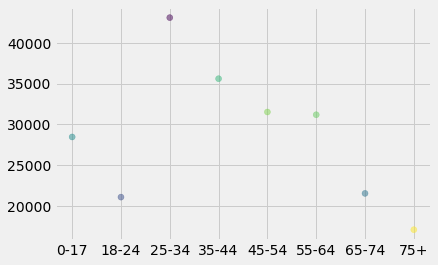

In [57]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
age = 'subgroup'
borough_filter = 'BK_CASE_COUNT'
plt.style.use('fivethirtyeight')
N = 8
colors = np.random.rand(N)

plt.scatter(by_boro[age], by_boro[borough_filter], c=colors, alpha=0.5)

plt.show()

# width = 0.25
# labels = ["0-17", "18-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75+"]
# data1 = group_data.groupby('subgroup')[borough_filter].sum()
# data2 = group_data.groupby('subgroup')[borough_fatality_filter].sum()
# x = np.arange(len(labels))

# plt.style.use('fivethirtyeight')
# fig, ax1= plt.subplots(figsize=(20,10))
# ax2 = ax1.twinx()

In [58]:
columns = list(by_boro.columns)
columns

['subgroup',
 'BK_CASE_COUNT',
 'BK_DEATH_COUNT',
 'BX_CASE_COUNT',
 'BX_DEATH_COUNT',
 'MN_CASE_COUNT',
 'MN_DEATH_COUNT',
 'QN_CASE_COUNT',
 'QN_DEATH_COUNT',
 'SI_CASE_COUNT',
 'SI_DEATH_COUNT',
 'BK_FATALITY_RATE',
 'BX_FATALITY_RATE',
 'MN_FATALITY_RATE',
 'QN_FATALITY_RATE',
 'SI_FATALITY_RATE']

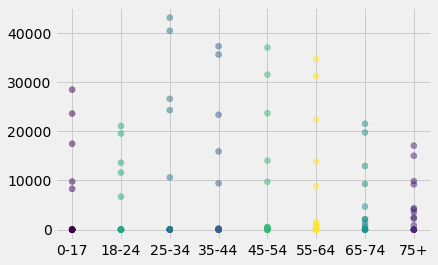

In [59]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
age = 'subgroup'
borough_filter = 'BK_CASE_COUNT'
plt.style.use('fivethirtyeight')
N = 8
colors = np.random.rand(N)
for col in columns[1:]:
    plt.scatter(by_boro[age], by_boro[col], c=colors, alpha=0.5, label=col)

plt.show()